In [1]:
# Example of Nuclei and Cell Segmentation Using UNSEG

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
from skimage.segmentation import mark_boundaries

In [3]:
from unseg import nuclei_cell_segmentation

In [4]:
def open_img(path_to_img):
    """Returns the RGB image (img) and two channels with
    nuclei (DAPI) and cell membrane (Na+K+ATPase) markers"""
    img = io.imread(path_to_img, plugin="tifffile")
    h = img.shape[0]
    w = img.shape[1]
    intensity = np.zeros((h,w,2), dtype='float64')
    intensity[:,:,0] = img[:,:,2] # Nuclei Marker
    intensity[:,:,1] = img[:,:,0] # Cell Membrane Marker
    return intensity, img

def plot_img(img, tlt='', cmp='gray'):
    """ Plot function """
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,5))
    fig.subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=1.0, wspace=None, hspace=None)
    ax.imshow(img, cmap=cmp)
    ax.set_title(tlt)
    ax.axis('on')
    plt.show()

In [5]:
# Path to image
path_to_img = './image/Gallbladder_Normal_Tissue.tif'

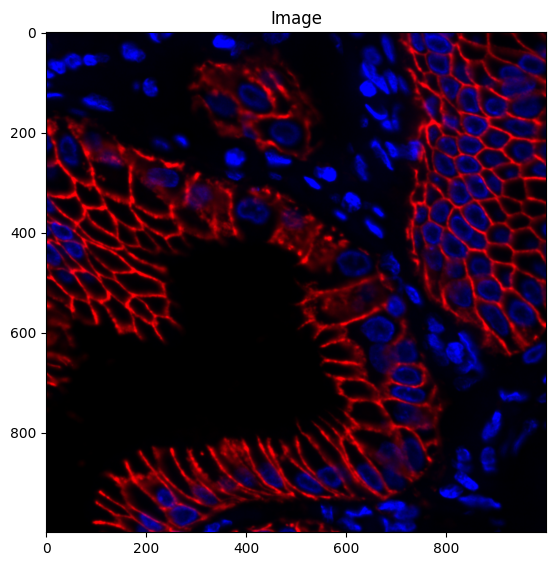

In [6]:
# Open and plot the original image
intensity, img = open_img(path_to_img)
plot_img(img, tlt='Image')

In [7]:
# Segment Nuclei and Cells
mask_nuclei, mask_cells, n_nuclei, n_cells = nuclei_cell_segmentation(intensity,
                                                                      area_threshold=20,
                                                                      convexity_threshold=4,
                                                                      cell_marker_threshold=25,
                                                                      dist_tr='GDT',
                                                                      sigma0=3,
                                                                      k0=1,
                                                                      r0=5,
                                                                      pct=[0.01, 0.01],
                                                                      nk=[5, 10, 20, 40],
                                                                      t0=0.5,
                                                                      ternary_met='Argmax',
                                                                      visualization=False,
                                                                      area_ratio_threshold=0.65,
                                                                      dilation_radius=5)

# To segment nuclei and cells with default settings run the code as follows: 
# mask_nuclei, mask_cells, n_nuclei, n_cells = nuclei_cell_segmentation(intensity)


NUCLEI SEGMENTATION...

 0. Preprocessing...
	-processing time = 0.02 seconds
 1. Computing of A Priori Probabilities...
	-processing time = 0.27 seconds
 2. Computing of A Priori Global and Local (Binary) Masks...
	propability threshold (channel 0) = 0.010
	propability threshold (channel 1) = 0.010
	-processing time = 1.77 seconds
 3. Computing of Likelihood...
	min intensity (channel 0) = 0.1020
	min intensity (channel 1) = 0.0627
	-processing time = 2.37 seconds
 4. Computing of A Posteriori Global and Local (Ternary) Masks...
	clustering method: Argmax
	-processing time = 0.16 seconds
 5. Convexity Analysis...
	formation of:
	 -initial Nuclei Segmentation (NS)
	 -list of Nuclei Clusters (NC)
	 -list of Small Objects (SO)
	---------------------------------------------------
	Non-convexity Threshold = 4 pxs
	Min Area Threshold = 20 pxs
	Small Object Area Threshold = 212 pxs
	---------------------------------------------------
	Summary for Nuclei Global Ternary Mask
	----------------

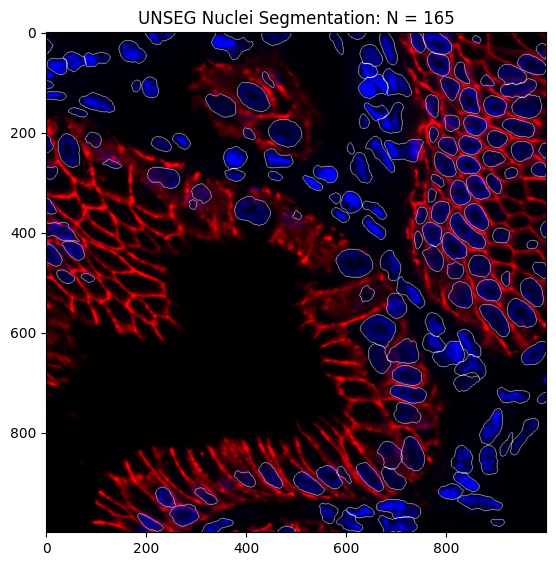

In [8]:
# Plot nuclei segmentation mask
plot_img(mark_boundaries(img, mask_nuclei, color=(1,1,1)), tlt='UNSEG Nuclei Segmentation: N = {0}'.format(n_nuclei))

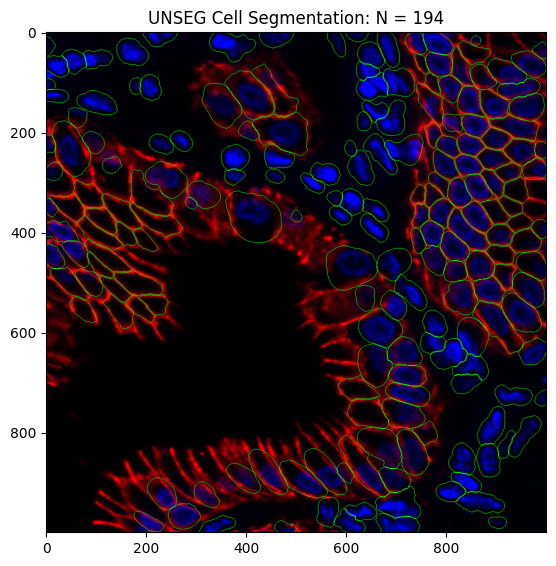

In [9]:
# Plot cell segmentation mask
plot_img(mark_boundaries(img, mask_cells, color=(0,1,0)), tlt='UNSEG Cell Segmentation: N = {0}'.format(n_cells))

In [10]:
# Save nuclei and cell segmentations as txt files 
#np.savetxt('Segmentation_nuclei_{0}.txt'.format(n_nuclei), mask_nuclei, fmt='%d', delimiter=' ')
#np.savetxt('Segmentation_cells_{0}.txt'.format(n_cells), mask_cells, fmt='%d', delimiter=' ')